# Review project A: Early biomarkers of Parkinson's Disease

This project is for independent work during our in-class session. Our goal today is to review everything we've learned during the course so far. Think of using:
- comprehension lists;
- lambda functions;
- custom python functions;
- maniputions of numpy arrays;
- pandas: data cleaning and summaries;
- matplotlib for data visualization;
- scipy for statistical analysis.

Dataset source: https://www.kaggle.com/ruslankl/early-biomarkers-of-parkinsons-disease

<img src="files/early-biomarkers.png">

## Suggested tasks:
1. Create a group column based on the infomration in the `' Participant code '` column
2. (a) Plot various speech metrics comparing them between the three groups of participants. Start with a simple plot: for example, one speech feature metric (say, Duration of pause intervals) across three groups of participants. When done, integrate the code you wrote into a for loop: loop through the list of speech feature metrics (columns 41-64) and create the same plot for each of them. Remember to use `fig, axs = plt.subplots(n_rows, n_columns, figsize = (x, y))`. (b) Follow 2(a) steps for plotting one or several motor skill characteristics comparing them in the three groups of participants.
3. Which features differ significantly between the three participant groups? Perform one-way ANOVAs on each feature: start with writing the code for 1 feature, then integrate it into a for loop looping through the list of feature names. Add post-hoc pairwise comparisons between groups if the ANOVA reveals a statistically significant effect.
4. Pick one speech or motor feature that is different in PD compared to other groups: plot it in the PD group against age or gender. Do age / gender seem to play any role?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
parkinson = pd.read_csv('early-biomarkers-of-parkinsons-disease/dataset.csv')

In [3]:
parkinson.head()

,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,...,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,PD01,58,F,No,56,2,No,No,No,No,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,PD02,68,F,No,67,1,No,No,No,No,...,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,PD03,68,M,No,67,1,No,No,No,No,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,PD04,75,M,No,73,2,No,No,No,No,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,PD05,61,M,Yes,60,0.7,No,No,No,No,...,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


1. Create a group column based on the infomration in the ' Participant code ' column

In [4]:
parkinson.columns = parkinson.columns.str.strip()
parkinson.columns = parkinson.columns.str.replace('  ', '_')

In [5]:
parkinson['Group'] = parkinson.Participant_code.str.slice(stop = -2)

2. (a) Plot various speech metrics comparing them between the three groups of participants. Start with a simple plot: for example, one speech feature metric (say, Duration of pause intervals) across three groups of participants. When done, integrate the code you wrote into a for loop: loop through the list of speech feature metrics (columns 41-64) and create the same plot for each of them. Remember to use `fig, axs = plt.subplots(n_rows, n_columns, figsize = (x, y))`.

In [6]:
speech_metric_indices = range(41,65)

`enumerate` produces a list of tuples: the first value in each tuple is its index, the next one is the original value from our speech_metric_indices. Why do we need `enumerate`? We will use it in our loop. The first value in each tuple will serve as the subplot index, the second one will help us refer to the column we want to plot. You'll see below how to implement this.

In [7]:
list(enumerate(speech_metric_indices))

[(0, 41),
 (1, 42),
 (2, 43),
 (3, 44),
 (4, 45),
 (5, 46),
 (6, 47),
 (7, 48),
 (8, 49),
 (9, 50),
 (10, 51),
 (11, 52),
 (12, 53),
 (13, 54),
 (14, 55),
 (15, 56),
 (16, 57),
 (17, 58),
 (18, 59),
 (19, 60),
 (20, 61),
 (21, 62),
 (22, 63),
 (23, 64)]

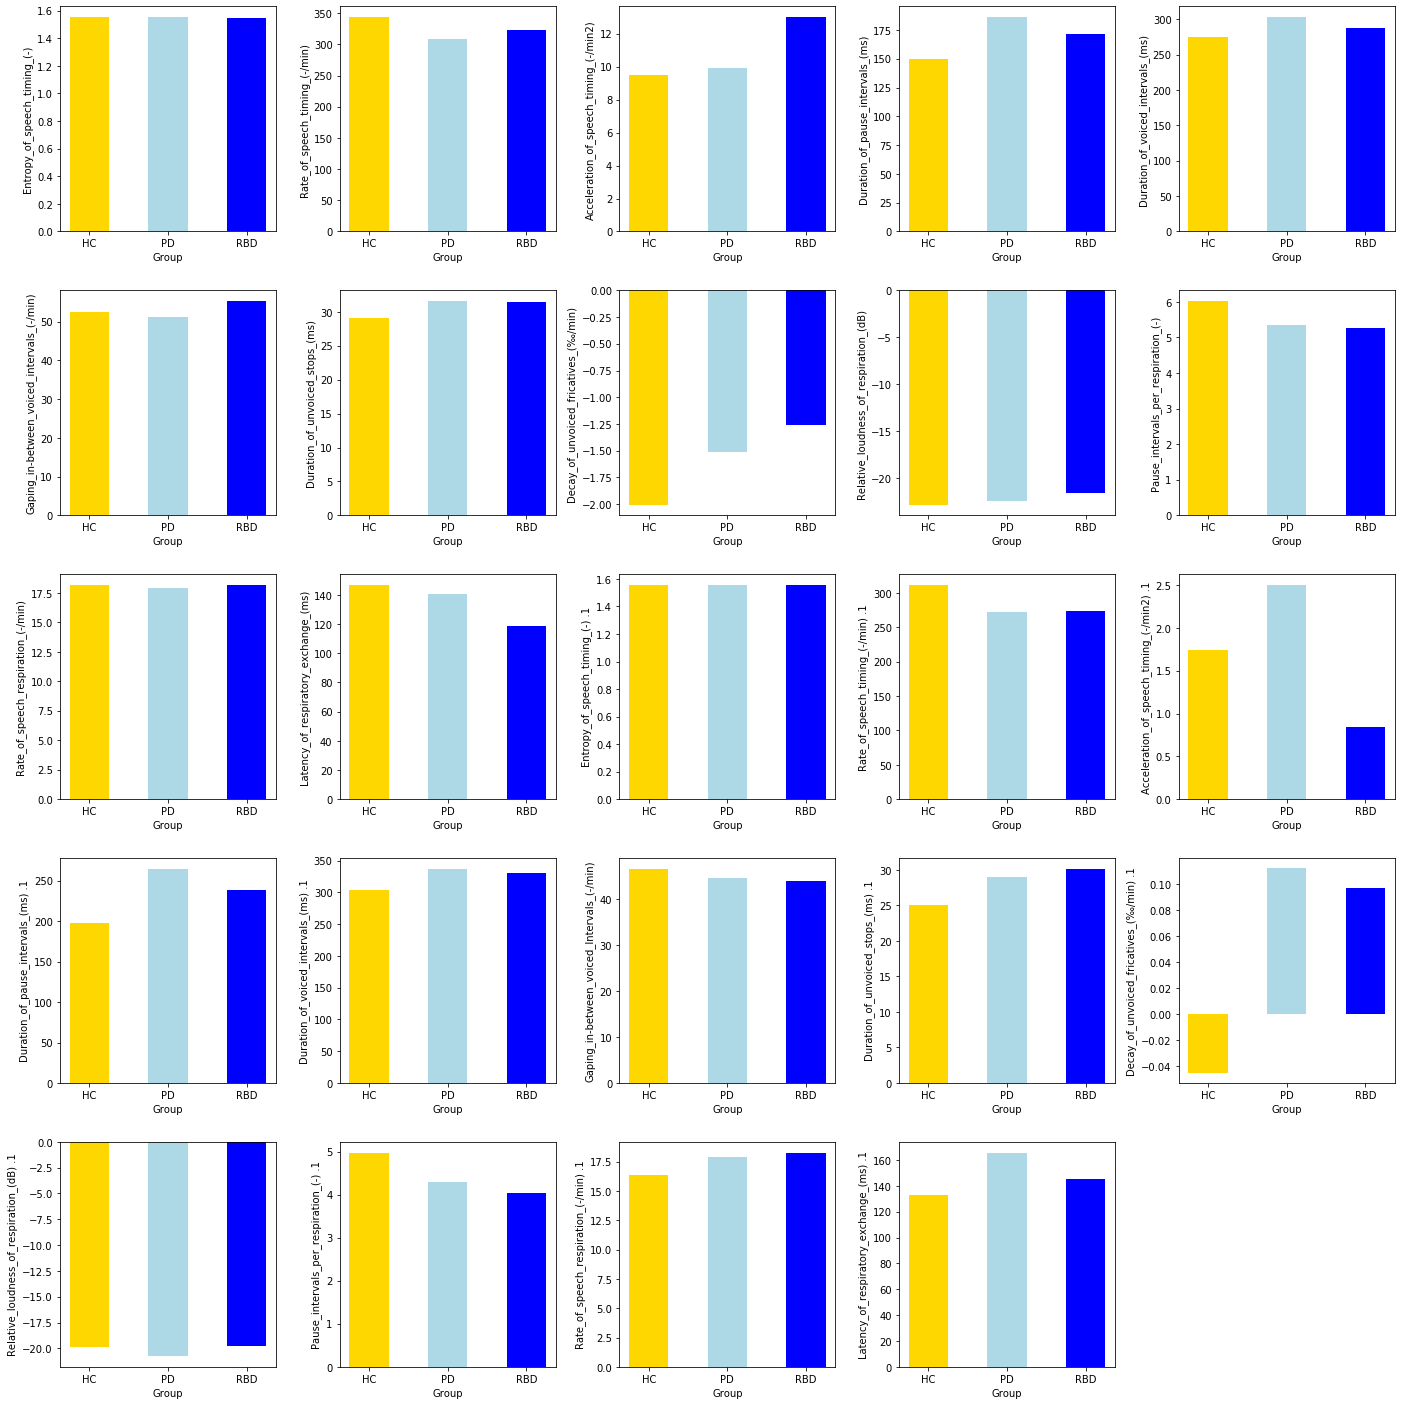

In [46]:
fig, ax = plt.subplots(figsize = (20,20))

for subplot_index, column_index in list(enumerate(speech_metric_indices)):
    fig.add_subplot(5,5, subplot_index+1)
    column_name = parkinson.columns[column_index]
    # for a faster solution, see next plot (that avoids recomputing groupby means for every plot)
    means = parkinson.groupby('Group').mean().reset_index()[column_name]
    plt.bar(range(len(means)), means, color = ['gold', 'lightblue', 'blue'], width=0.5)
    plt.xticks(range(len(means)), labels = list(parkinson.groupby('Group').mean().index))
    plt.xlabel('Group')
    plt.ylabel(column_name)

plt.tight_layout()
ax.axis('off')
plt.show()

2. (b) Follow 2(a) steps for plotting one or several motor skill characteristics comparing them in the three groups of participants.

In [23]:
for column in parkinson.columns[12:41]:
    parkinson[column] = pd.to_numeric(parkinson[column], errors='coerce')

In [70]:
by_group = parkinson.groupby('Group').agg([np.mean, np.std]).reset_index(drop=True).transpose().head(30)
by_group.columns = list(parkinson.groupby('Group').agg([np.mean, np.std]).index)
by_group.drop('HC', axis=1, inplace = True) # removing non-existing HC data
by_group.dropna(inplace = True)
features2plot = np.unique([feature for (feature, statistic) in by_group.index])
print(features2plot)
features2plot = features2plot[:-4]
by_group

['18._Speech' '19._Facial_Expression' '20._Tremor_at_Rest_-_LLE'
 '20._Tremor_at_Rest_-_LUE' '20._Tremor_at_Rest_-_RLE'
 '20._Tremor_at_Rest_-_RUE' '20._Tremor_at_Rest_-_head'
 '21._Action_or_Postural_Tremor_-_LUE'
 '21._Action_or_Postural_Tremor_-_RUE' '22._Rigidity_-_neck' 'Age_(years)'
 'Clonazepam_(mg/day)' 'Levodopa_equivalent_(mg/day)'
 'Overview_of_motor_examination:_UPDRS_III_total_(-)']


PD        RBD
Age_(years)                                        mean  64.933333  64.920000
                                                   std   10.916401   9.088769
Levodopa_equivalent_(mg/day)                       mean   0.000000   0.000000
                                                   std    0.000000   0.000000
Clonazepam_(mg/day)                                mean   0.066667   0.075000
                                                   std    0.217086   0.303046
Overview_of_motor_examination:_UPDRS_III_total_(-) mean  20.233333   5.160000
                                                   std   12.367040   4.132302
18._Speech                                         mean   0.433333   0.060000
                                                   std    0.504007   0.239898
19._Facial_Expression                              mean   1.200000   0.480000
                                                   std    0.924755   0.614120
20._Tremor_at_Rest_-_head                          mean   0.533333   0.080000
                                                   std    0.860366   0.274048
20._Tremor_at_Rest_-_RUE                           mean   0.533333   0.120000
                                                   std    0.730297   0.328261
20._Tremor_at_Rest_-_LUE                           mean   0.233333   0.000000
                                                   std    0.504007   0.000000
20._Tremor_at_Rest_-_RLE                           mean   0.100000   0.000000
                                                   std    0.305129   0.000000
20._Tremor_at_Rest_-_LLE                           mean   0.133333   0.060000
                                                   std    0.434172   0.313636
21._Action_or_Postural_Tremor_-_RUE                mean   0.766667   0.460000
                                                   std    0.626062   0.542481
21._Action_or_Postural_Tremor_-_LUE                mean   0.866667   0.480000
                                                   std    0.681445   0.579937
22._Rigidity_-_neck                                mean   0.966667   0.000000
                                                   std    1.033352   0.000000

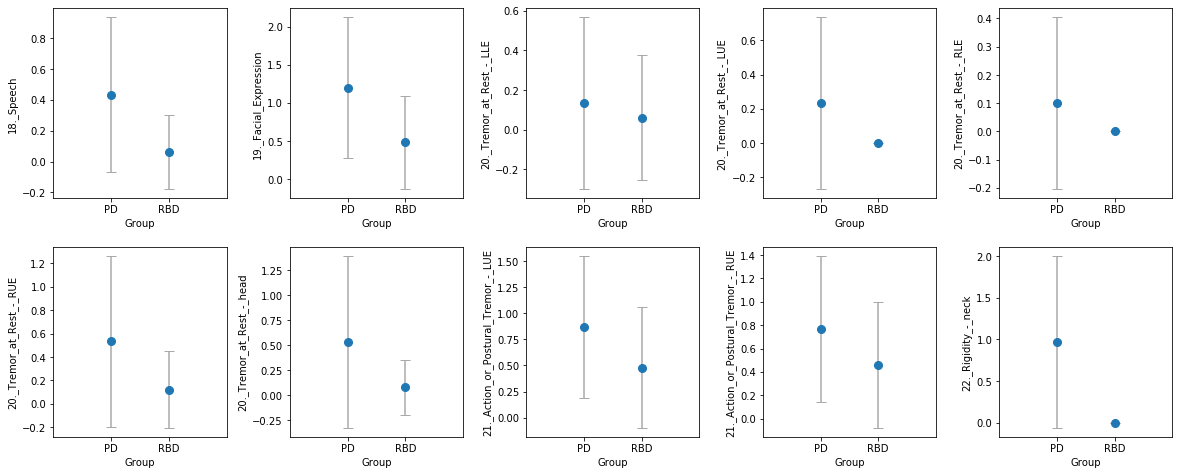

In [99]:
fig, ax = plt.subplots(figsize = (17,7))

subplot_index = 1
for feature in features2plot:
    ax_sub = fig.add_subplot(2,5,subplot_index)
    ax_sub.errorbar(range(len(by_group.loc[feature].loc['mean'])),
                by_group.loc[feature].loc['mean'],
                yerr = by_group.loc[feature].loc['std'],
                capsize=5, linestyle = '',
                marker='o', markersize=8, ecolor = 'darkgrey')
    plt.xticks(range(len(by_group.loc[feature].loc['mean'])), labels = by_group.columns)
    plt.xlim([-1, 2])
    plt.xlabel('Group')
    plt.ylabel(feature)
    subplot_index += 1
    
plt.tight_layout()
ax.axis('off')
plt.show()

3. Which features differ significantly between the three participant groups? Perform one-way ANOVAs on each feature: start with writing the code for 1 feature, then integrate it into a for loop looping through the list of feature names. Add post-hoc pairwise comparisons between groups if the ANOVA reveals a statistically significant effect.

In [26]:
# here only for speech features:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import*

speech_features = parkinson.columns[speech_metric_indices]

for feature in speech_features:
    data_HC = parkinson[feature][parkinson.Group == 'HC']
    data_PD = parkinson[feature][parkinson.Group == 'PD']
    data_RBD = parkinson[feature][parkinson.Group == 'RBD']
    fstat, pval = f_oneway(data_HC, data_PD, data_RBD)
    print("For " + feature + " the ANOVA p value is " + str(round(pval,3)))
    if pval < 0.05:        
        concatenated = np.concatenate([data_HC, data_PD, data_RBD])
        labels = ['HC'] * len(data_HC) + ['PD'] * len(data_PD) + ['RBD'] * len(data_RBD)
        pairwise_results = pairwise_tukeyhsd(concatenated, labels, 0.05)
        print('\n---')
        print('Tukey results for ' + feature)
        print(pairwise_results)

/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


For Entropy_of_speech_timing_(-) the ANOVA p value is 0.721
For Rate_of_speech_timing_(-/min) the ANOVA p value is 0.003

---
Tukey results for Rate_of_speech_timing_(-/min)
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
    HC     PD   -35.48 0.0029 -60.4606 -10.4994   True
    HC    RBD    -21.1 0.0576 -42.7338   0.5338  False
    PD    RBD    14.38 0.3632 -10.6006  39.3606  False
------------------------------------------------------
For Acceleration_of_speech_timing_(-/min2) the ANOVA p value is 0.306
For Duration_of_pause_intervals_(ms) the ANOVA p value is 0.002

---
Tukey results for Duration_of_pause_intervals_(ms)
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    HC     PD  36.2467 0.0017  11.8499 60.6435   True
    HC    RBD     22.0 0.0392   0.8

4. Pick one speech or motor feature that is different in PD compared to other groups: plot it in the PD group against age or gender. Do age / gender seem to play any role?

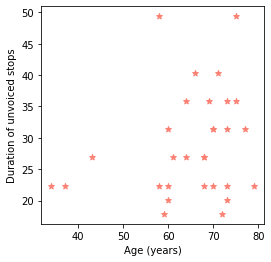

In [51]:
fig = plt.figure(figsize = (4,4))
plt.scatter(parkinson[parkinson.Group == 'PD']['Age_(years)'],
           parkinson[parkinson.Group == 'PD']['Duration_of_unvoiced_stops_(ms) .1'],
           color = 'salmon', marker = '*')
plt.xlabel('Age (years)')
plt.ylabel('Duration of unvoiced stops')
plt.show()

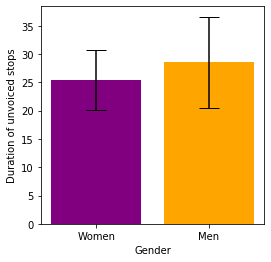

In [54]:
women = parkinson[parkinson.Gender == 'F']
men = parkinson[parkinson.Gender == 'M']

fig = plt.figure(figsize = (4,4))
plt.bar(range(2), [women['Duration_of_unvoiced_stops_(ms) .1'].mean(),
                   men['Duration_of_unvoiced_stops_(ms) .1'].mean()],
        yerr = [women['Duration_of_unvoiced_stops_(ms) .1'].std(),
                   men['Duration_of_unvoiced_stops_(ms) .1'].std()],
       color = ['purple', 'orange'], capsize = 10)
plt.xticks(range(2), ['Women', 'Men'])
plt.xlabel('Gender')
plt.ylabel('Duration of unvoiced stops')
plt.show()